In [1]:
from overpass import API
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from geopy.distance import vincenty

In [2]:
api = API()
response = api.Get('way["highway"]["highway"!~"footway|cycleway|path|service|track|pedestrian|steps|crossing"](40.751872, -73.994120 ,40.752353, -73.989678);')

In [3]:
node_dic={}
x = 0
for features in response['features']:
    for coordinate in features['geometry']['coordinates']:
        # print(x, j[1], j[0])
        node_dic[x] = (coordinate[1], coordinate[0])
        x += 1

In [4]:
cor_dic=defaultdict(list)
for node_num in node_dic:
    cor_dic[node_dic[node_num]].append(node_num)

In [5]:
node_dic

{0: (40.749102, -73.984076),
 1: (40.7504072, -73.9871631),
 2: (40.750458, -73.9872889),
 3: (40.7506202, -73.9876732),
 4: (40.7506639, -73.9877768),
 5: (40.7507266, -73.9879255),
 6: (40.7516588, -73.9901341),
 7: (40.7528582, -73.9929759),
 8: (40.7540155, -73.9957182),
 9: (40.7540684, -73.995845),
 10: (40.7546186, -73.997152),
 11: (40.7546525, -73.9972277),
 12: (40.7552114, -73.9966605),
 13: (40.755102, -73.9963996),
 14: (40.7546795, -73.995396),
 15: (40.7546287, -73.9952703),
 16: (40.7534779, -73.9925251),
 17: (40.7530724, -73.9915577),
 18: (40.7522886, -73.9896878),
 19: (40.7514288, -73.9876368),
 20: (40.751088, -73.9868238),
 21: (40.74658, -73.9975495),
 22: (40.7472035, -73.9970954),
 23: (40.7478218, -73.9966452),
 24: (40.7484275, -73.996204),
 25: (40.7490521, -73.9957492),
 26: (40.7496742, -73.9952961),
 27: (40.7502936, -73.9948451),
 28: (40.7515147, -73.9939557),
 29: (40.7521959, -73.9934596),
 30: (40.7521959, -73.9934596),
 31: (40.7528582, -73.9929759

In [6]:
cor_dic

defaultdict(list,
            {(40.74658, -73.9975495): [21],
             (40.7472035, -73.9970954): [22],
             (40.7478218, -73.9966452): [23],
             (40.7484275, -73.996204): [24],
             (40.7490521, -73.9957492): [25],
             (40.749102, -73.984076): [0],
             (40.7496742, -73.9952961): [26],
             (40.7502936, -73.9948451): [27],
             (40.7504072, -73.9871631): [1],
             (40.750458, -73.9872889): [2],
             (40.7506202, -73.9876732): [3],
             (40.7506639, -73.9877768): [4],
             (40.7507266, -73.9879255): [5],
             (40.7510002, -73.990617): [36, 46],
             (40.751088, -73.9868238): [20],
             (40.7514288, -73.9876368): [19],
             (40.7515147, -73.9939557): [28],
             (40.7516588, -73.9901341): [6, 45],
             (40.751874, -73.9926944): [37],
             (40.7521959, -73.9934596): [29, 30, 38, 39],
             (40.7522886, -73.9896878): [18, 44],
        

In [7]:
node_size = len(node_dic)
arc_list = np.zeros((node_size,node_size),dtype='int')
distance_list= np.zeros((node_size,node_size),dtype='float')

In [8]:
x =0
for feature in response['features']:
    try:
        if feature['properties']['oneway'] =='yes':
            print(feature['properties'])
            for i, coordinate in enumerate(feature['geometry']['coordinates']):
                if i != len(feature['geometry']['coordinates']) - 1:
                    arc_list[cor_dic[node_dic[x]][0]][cor_dic[node_dic[x + 1]][0]] += 1

                    distance = vincenty(node_dic[x],node_dic[x + 1]).km*100 #미터단위
                    distance_list[cor_dic[node_dic[x]][0]][[cor_dic[node_dic[x + 1]][0]]] = distance
                    # print("단방향" ,node_dic[x], cor_dic[node_dic[x]], node_dic[x + 1], cor_dic[node_dic[x + 1]])
                x += 1
    except:
        # print(feature['properties'])
        for i, coordinate in enumerate(feature['geometry']['coordinates']):
            if i != len(feature['geometry']['coordinates']) - 1:
                arc_list[cor_dic[node_dic[x]][0]][cor_dic[node_dic[x + 1]][0]] += 1
                arc_list[cor_dic[node_dic[x + 1]][0]][cor_dic[node_dic[x]][0]] += 1

                distance = vincenty(node_dic[x], node_dic[x + 1]).km * 100  # 미터단위
                distance_list[cor_dic[node_dic[x]][0]][[cor_dic[node_dic[x + 1]][0]]] = distance
                distance_list[cor_dic[node_dic[x+1]][0]][[cor_dic[node_dic[x]][0]]] = distance

                # print("양방향",
                #       node_dic[x], cor_dic[node_dic[x]], node_dic[x + 1], cor_dic[node_dic[x + 1]],"<->" ,node_dic[x + 1], cor_dic[node_dic[x + 1]],node_dic[x], cor_dic[node_dic[x]]
                #       )
            x += 1

{'highway': 'unclassified', 'tiger:name_direction_prefix_1': 'W', 'name': 'West 35 Street', 'tiger:name_base': '35th', 'tiger:name_base_1': '35', 'tiger:cfcc': 'A41', 'tiger:name_type': 'St', 'tiger:zip_left': '10001', 'tiger:name_type_1': 'St', 'tiger:zip_right': '10001', 'tiger:reviewed': 'no', 'oneway': 'yes', 'tiger:name_direction_prefix': 'W', 'tiger:county': 'New York, NY'}
{'highway': 'secondary', 'tiger:name_base_1': '36', 'name': 'West 36th Street', 'tiger:name_base': '36th', 'tiger:cfcc': 'A41', 'tiger:name_type_1': 'St', 'tiger:name_type': 'St', 'tiger:zip_left': '10018', 'tiger:name_direction_prefix_1': 'W', 'hgv': 'destination', 'tiger:zip_right': '10018', 'name_1': 'West 36 Street', 'tiger:reviewed': 'no', 'oneway': 'yes', 'tiger:name_direction_prefix': 'W', 'tiger:county': 'New York, NY'}
{'cycleway:left': 'track', 'highway': 'secondary', 'tiger:name_base_1': '8', 'name': '8th Avenue', 'tiger:name_base': '8th', 'tiger:cfcc': 'A41', 'wikipedia': 'en:Eighth Avenue (Manhatt

In [9]:
Arc_tuple_List = []
for x,y in enumerate(arc_list):
    for i,j in enumerate(y):
        if arc_list[x,i] != False:
            Arc_tuple_List.append((x,i))

In [10]:
Arc_tuple_List

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (7, 16),
 (8, 9),
 (9, 10),
 (10, 11),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (16, 33),
 (17, 18),
 (18, 19),
 (19, 20),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (28, 29),
 (29, 7),
 (29, 37),
 (29, 40),
 (33, 34),
 (34, 35),
 (36, 37),
 (37, 29),
 (37, 36),
 (40, 41),
 (41, 42)]

In [11]:
G = nx.MultiGraph()
G.add_nodes_from(node_dic)
G.add_edges_from(Arc_tuple_List)

In [16]:
nx.draw(G, pos=node_dic,with_labels=True, node_size = 300, 
        width=0.3)

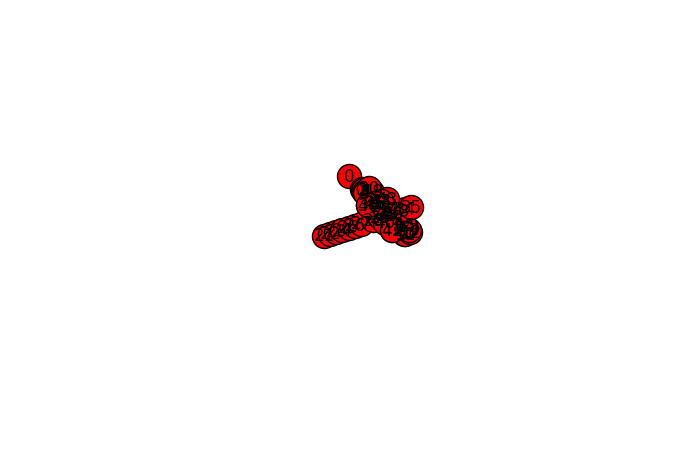

In [17]:
plt.show()